# Techniques to choose the right machine learning algorithm

## Step 1: Visualization of Data

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/monalisapatra26/ML4Science/main/Classification/Decision%20Trees/diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Pair Plot Method

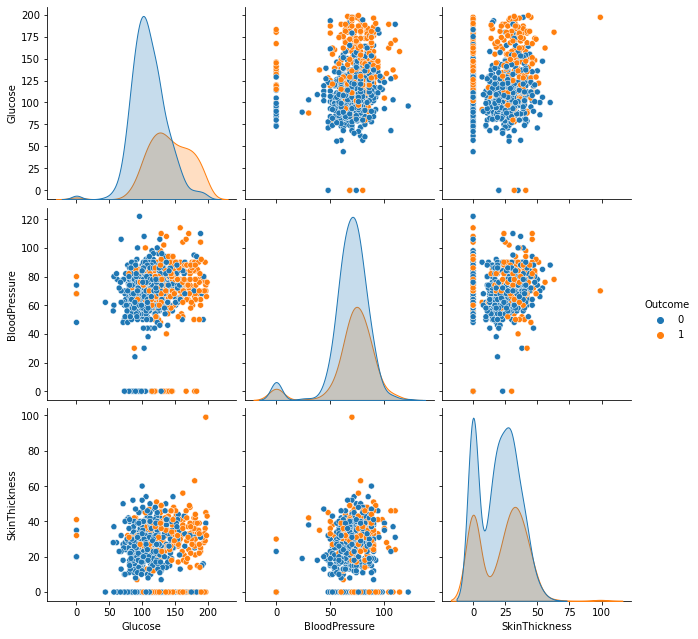

In [3]:
sb.pairplot(data=df[['Glucose' ,'BloodPressure','SkinThickness', 'Outcome']], hue='Outcome', dropna=True, height=3)

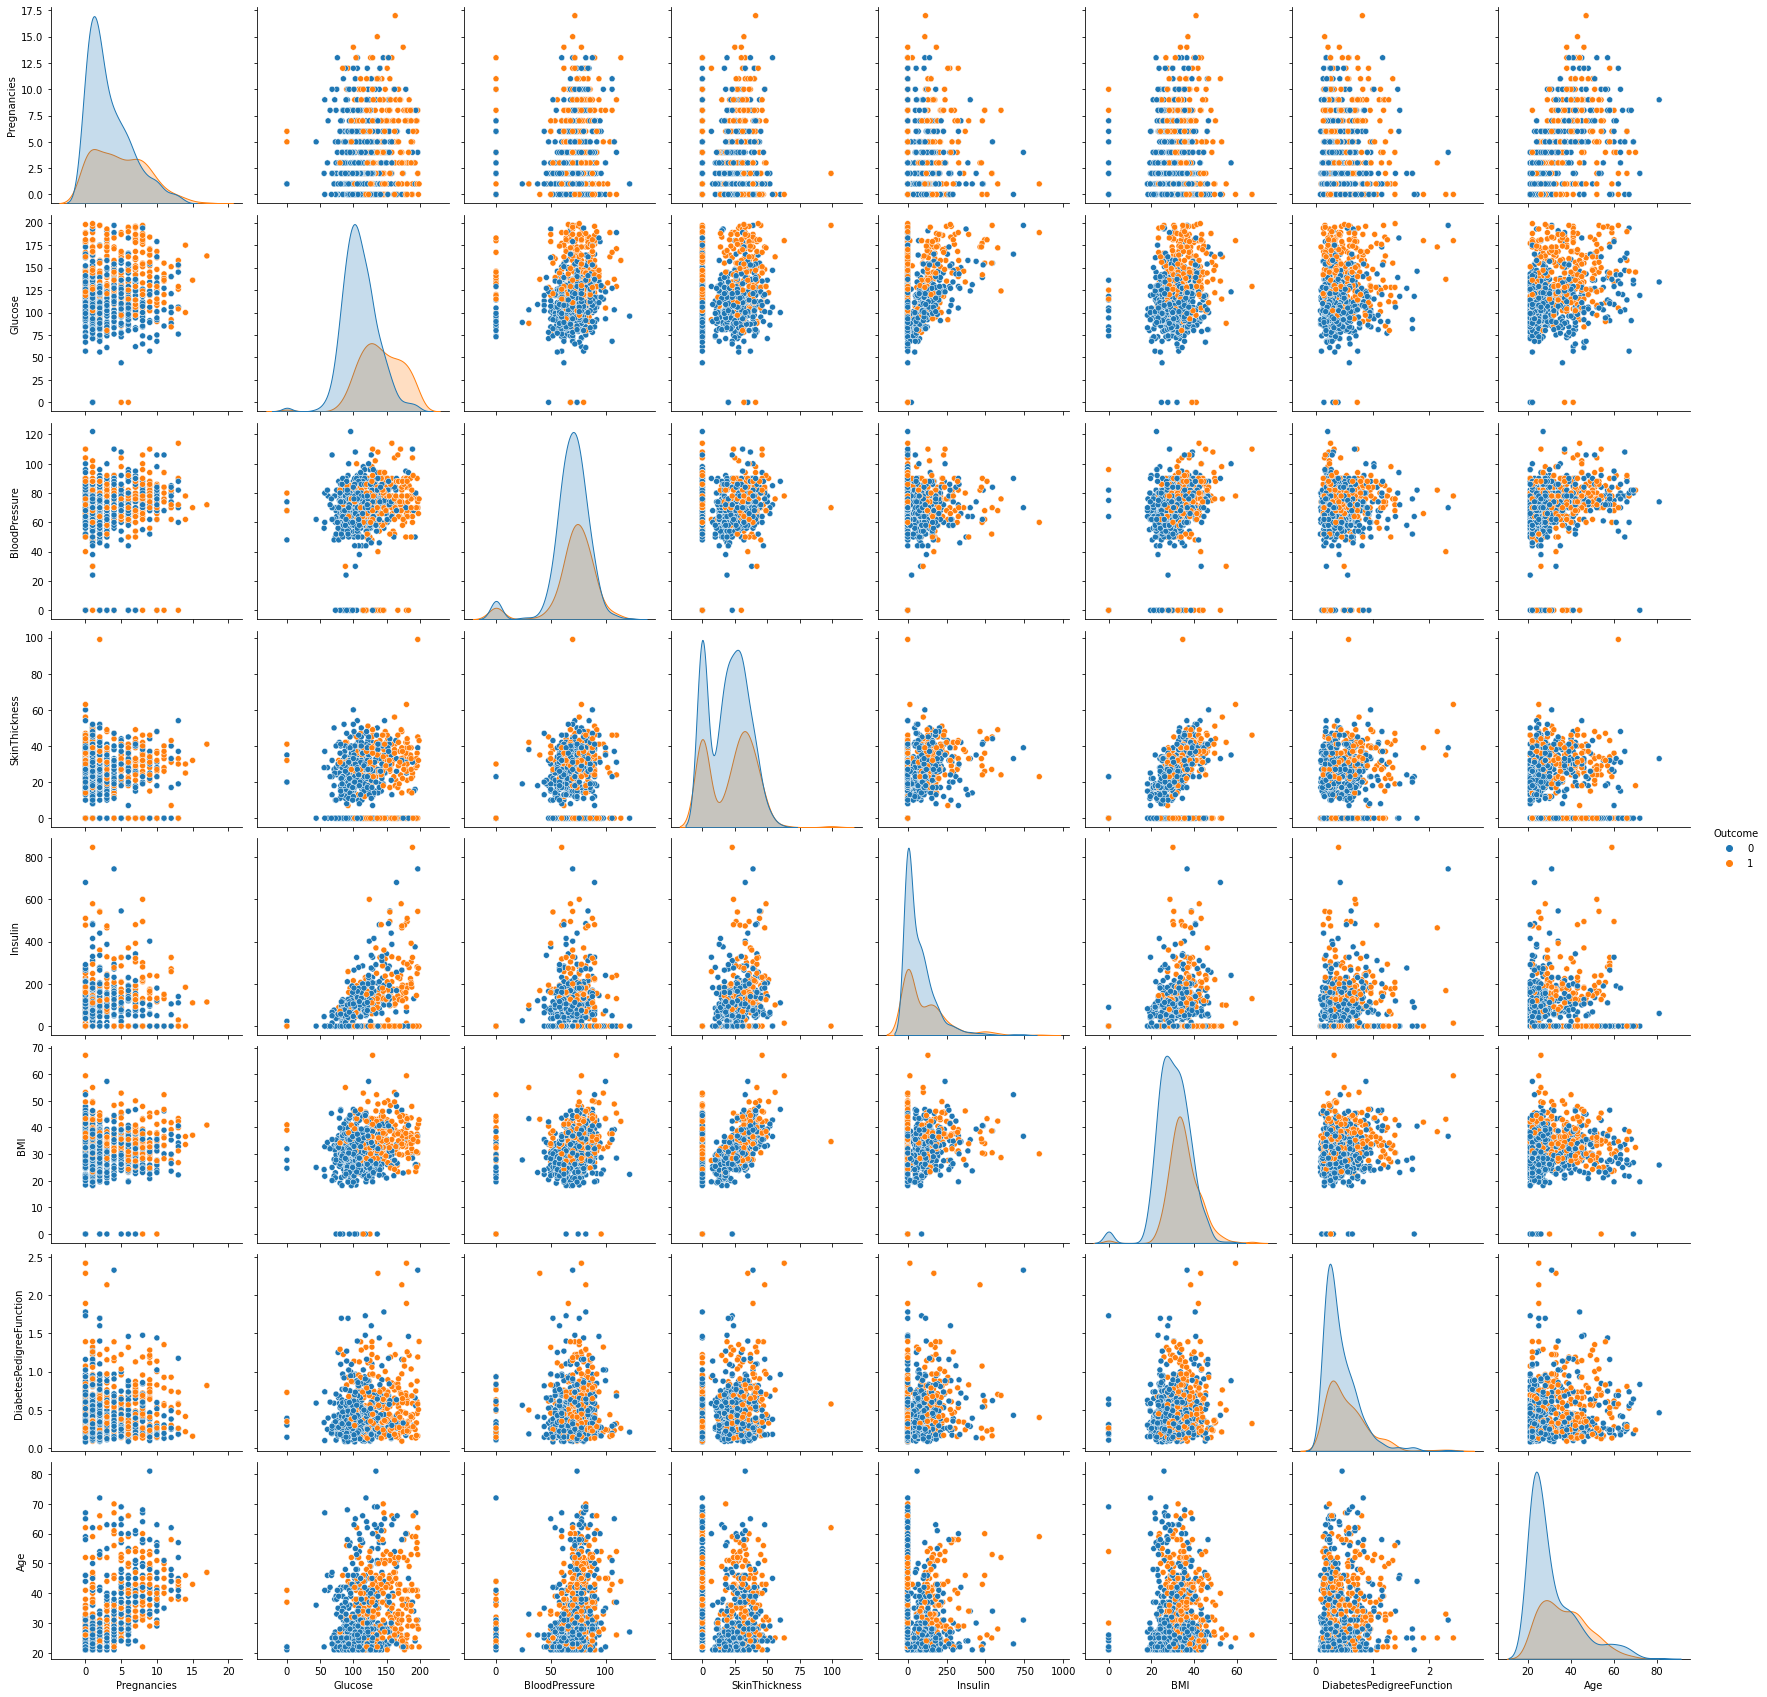

In [4]:
sb.pairplot(df, hue='Outcome', dropna=True, height=3)

Assumptions from the plot:

1) There is a lot of overlap between the data points. KNN should be preferred as it works on the principle of Euclidean distance

2) If your KNN is not performing as per expectation, we use Decision Tree. It works on the principle of non-linear classification. 

3) Logistic Regression and SVM are preferred, where classes can be separated by a straight line.  It easily separates the data points by drawing a line that divides the target class. Linear regression algorithms assume that data trends follow a straight line.

## Size of Training Data and Training Time

In [5]:
#Import Sklearn Libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [6]:
#Store independent and dependent variable
feature = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = df[feature] # Features
y = df["Outcome"]

In [25]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


## Find the correlation between the features

In [7]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Decision Tree

In [15]:
# Create Decision Tree classifier object
import time
clfDT= DecisionTreeClassifier()
# Train Decision Tree Classifier
start = time.time()
clfDT = clfDT.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
tdt = stop - start

Training time: 0.003469705581665039s


## Logistic Regression

In [16]:
#Import sklearn library
from sklearn.linear_model import LogisticRegression
import time
clfLR = LogisticRegression(random_state = 0) 
start = time.time()
clfLR.fit(X_train,y_train) 
stop = time.time()
print(f"Training time: {stop - start}s")
tlr = stop - start

Training time: 0.026076316833496094s


## Support Vector Machine

In [17]:
# Support Vector Classifier
from sklearn.svm import SVC  
clfSVM = SVC(kernel='linear') 
start = time.time() 
# fitting x samples and y classes 
clfSVM.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
tsvm = stop - start

Training time: 2.447782278060913s


## KNN algorithm

In [18]:
from sklearn.neighbors import KNeighborsClassifier 
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
start = time.time() 
# fitting x samples and y classes 
classifier.fit(X_train, y_train) 
stop = time.time()
print(f"Training time: {stop - start}s")
tknn = stop - start

Training time: 0.008544206619262695s


## Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
clnb = GaussianNB()
start = time.time() 
# fitting x samples and y classes 
clnb.fit(X_train, y_train) 
stop = time.time()
print(f"Training time: {stop - start}s")
tnb = stop - start

Training time: 0.004683732986450195s


In [20]:
yDT_predict=clfDT.predict(X_test)
yLR_predict=clfLR.predict(X_test)
ySVM_predict=clfSVM.predict(X_test)
yKNN_predict=classifier.predict(X_test)
yNB_predict = classifier.predict(X_test)

In [23]:
print("Accuracy and Time(sec) for Decision Tree:",metrics.accuracy_score(y_test, yDT_predict),", " ,tdt)
print("Accuracy and Time(sec) for Logistic Regression:",metrics.accuracy_score(y_test, yLR_predict),", " ,tlr)
print("Accuracy and Time(sec) for Support Vector Machine:",metrics.accuracy_score(y_test, ySVM_predict),", " ,tsvm)
print("Accuracy and Time(sec) for K Nearest Neighbour:",metrics.accuracy_score(y_test, yKNN_predict),", " ,tknn)
print("Accuracy and Time(sec) for Naive Bayes:",metrics.accuracy_score(y_test, yNB_predict),", " ,tnb)

Accuracy and Time(sec) for Decision Tree: 0.70995670995671 ,  0.003469705581665039
Accuracy and Time(sec) for Logistic Regression: 0.7835497835497836 ,  0.026076316833496094
Accuracy and Time(sec) for Support Vector Machine: 0.7922077922077922 ,  2.447782278060913
Accuracy and Time(sec) for K Nearest Neighbour: 0.7748917748917749 ,  0.008544206619262695
Accuracy and Time(sec) for Naive Bayes: 0.7748917748917749 ,  0.004683732986450195
